<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session14/Overlap_and_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Overlaping and masking**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
from PIL import Image
import random
import copy
import PIL

# **Create a required folders**

In [0]:
!mkdir Overlay1

In [0]:
%cd Overlay1
!mkdir Fg-Bg
!mkdir Fg-Bg-Mask

/content/Overlay1


In [0]:
%cd ..

/content


## **Overlap and mask**
 for each of 100 background images, overlap 20 foreground images and its flips in 20 random positions and create their masks .

In [0]:
path = "/gdrive/mask_rcnn/Sushmitha/"
start =1 
#black background
black = np.zeros((224,224))


#for 100 background images
for i in range(1,101):

    bg = Image.open(f'{path}living_room_224_224/bg{str(i)}.jpg')

    #for 20 foreground images
    for j in  range(1,21):
     
      fg = Image.open(f'{path}Sushmitha/Foreground/fg{str(j)}.png')
      mask = Image.open(f'{path}Sushmitha/Mask/mask{str(j)}.jpg').convert('1')

      #20 random places
      for k in range(1,21): 
       
        r1 = random.randint(1, 120)
        r2 = random.randint(1, 120)
        bg1 = copy.deepcopy(bg)
        bg2 = copy.deepcopy(bg)
        fg1 = copy.deepcopy(fg)
        m1 = copy.deepcopy(mask)
        black_img1 = Image.fromarray(black,mode='1')
        black_img2 = Image.fromarray(black,mode='1')

        flipfg = fg1.transpose(PIL.Image.FLIP_LEFT_RIGHT) #flip image
        flipmask = m1.transpose(PIL.Image.FLIP_LEFT_RIGHT) #flip mask

        
        #totally 4 images at once, 1 fg-bg, 1 flipped-fg-bg, 1fg-bg-mask, 1 flipped-fg-bg-mask

        bg1.paste(fg1, (r1,r2),fg1)
        bg2.paste(flipfg,(r1,r2),flipfg)
        black_img1.paste(m1,(r1,r2), m1)
        black_img2.paste(flipmask,(r1,r2), flipmask)

        #save the images

        bg1.save(f"/content/Overlay1/Fg-Bg/fg-bg{str(start)}.jpg",optimize=True, quality=30)
        black_img1.save(f"/content/Overlay1/Fg-Bg-Mask/fg-bg-mask{str(start)}.jpg",optimize=True, quality=30) 
        start+=1

        bg2.save(f"/content/Overlay1/Fg-Bg/fg-bg{str(start)}.jpg", optimize=True, quality=30)
        black_img2.save(f"/content/Overlay1/Fg-Bg-Mask/fg-bg-mask{str(start)}.jpg", optimize=True, quality=30)
        start+=1
        print(start)
        
        

    
      
    

In [0]:
!pwd

/content


## **zip and save in drive**

In [0]:
#Export Zip file
from zipfile import ZipFile 
import zipfile
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
def main(): 
    # path to folder which needs to be zipped 
    directory = 'Overlay1'
  
    # calling function to get all file paths in the directory 
    file_paths = get_all_file_paths(directory) 
  
    # printing the list of all files to be zipped 
    print('Following files will be zipped:') 
    for file_name in file_paths: 
        print(file_name) 
  
    # writing files to a zipfile 
    with ZipFile('/content/gdrive/My Drive/Mask_Rcnn/Sushmitha/data_Part1.zip','a', compression = zipfile.ZIP_DEFLATED) as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!')         
  
  

main() 

In [0]:
!ls Overlay/Fg-Bg-Mask | wc -l

80000


## **Sample image**







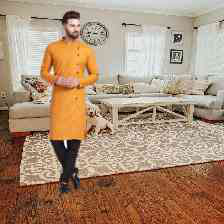

In [0]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
Image.open("Overlay/Fg-Bg/fg-bg80000.jpg")

